In [15]:
%matplotlib inline

In [7]:
!pip uninstall qiskit-aer qiskit-terra qiskit-ignis qiskit-visualization -y

Found existing installation: qiskit-aer 0.15.1
Uninstalling qiskit-aer-0.15.1:
  Successfully uninstalled qiskit-aer-0.15.1
Found existing installation: qiskit-terra 0.46.0
Uninstalling qiskit-terra-0.46.0:
  Successfully uninstalled qiskit-terra-0.46.0


In [5]:
!pip uninstall qiskit-y

In [ ]:
!pip list

In [11]:
from qiskit import QuantumCircuit,assemble
from qiskit_aer import Aer

In [ ]:
!pip install qiskit-aer

In [10]:
import qiskit
print(qiskit.__version__)

1.2.4


In [12]:
#from qiskit.execute import execute, assemble
from qiskit.visualization import plot_histogram
import numpy as np

In [4]:
conda install ipykernel

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
!python -m ipykernel install --user --name=qkd_env --display-name "Python (qkd_env)"

Installed kernelspec qkd_env in /Users/shivam/Library/Jupyter/kernels/qkd_env


In [ ]:
conda install matplotlib 

In [16]:
import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


Measurement results: {'01': 270, '00': 235, '11': 277, '10': 242}


/var/folders/zp/_4t4c89s6xgf0z8b9dhl5_dc0000gn/T/ipykernel_7668/1043905585.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(values), palette='pastel')


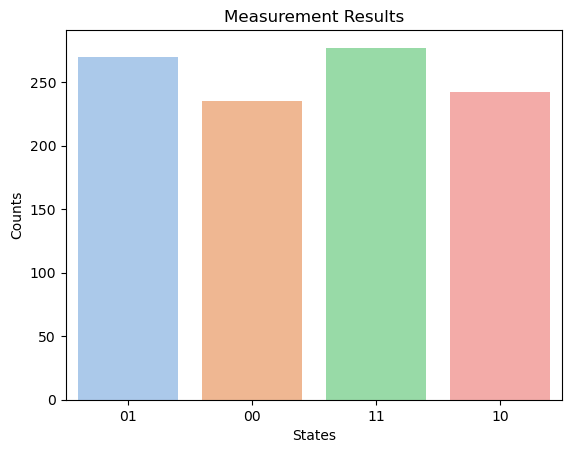

In [43]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

def simulate_circuit(qc):
    # Use the QASM simulator backend
    simulator = Aer.get_backend('qasm_simulator')
    
    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(qc, simulator)
    
    # Run the circuit on the simulator
    job = simulator.run(transpiled_circuit, shots=1024)
    
    # Get the results from the job
    result = job.result()
    
    # Retrieve counts from the result
    counts = result.get_counts(qc)
    

    return counts

import seaborn as sns

def plot_results_seaborn(counts):
    """Function to plot histogram using Seaborn."""
    # Convert counts to a format suitable for seaborn
    labels, values = zip(*counts.items())
    sns.barplot(x=list(labels), y=list(values), palette='pastel')
    plt.title('Measurement Results')
    plt.xlabel('States')
    plt.ylabel('Counts')
    plt.show()

def qkd_protocol():
    # Create a quantum circuit with 2 qubits (Alice and Bob)
    qc = QuantumCircuit(2, 2)  # 2 qubits and 2 classical bits

    # Alice prepares her qubit in a random state
    qc.h(0)  # Apply Hadamard gate to create superposition
    qc.h(1)  # Optional: Bob can also apply a Hadamard gate

    # Measure both qubits
    qc.measure(0, 0)  # Measure Alice's qubit
    qc.measure(1, 1)  # Measure Bob's qubit

    # Call the simulate_circuit function
    counts = simulate_circuit(qc)

    # Print the measurement results
    print("Measurement results:", counts)

   
    plot_results_seaborn(counts)  # or plot_results_plotly(counts), etc.

# Run the QKD protocol simulation
qkd_protocol()

Implementing BB84 protocol

In [41]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.1 MB/s eta 0:00:00a 0:00:01


Measurement results: {'10': 494, '00': 530}
Alice's basis: Computational
Bob's basis: Hadamard


/var/folders/zp/_4t4c89s6xgf0z8b9dhl5_dc0000gn/T/ipykernel_7668/2175108261.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(values), palette='pastel')


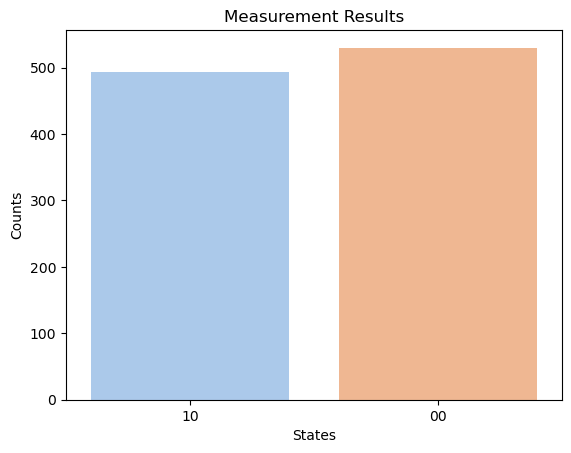

In [43]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import random

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

def simulate_circuit(qc):
    # Use the QASM simulator backend
    simulator = Aer.get_backend('qasm_simulator')
    
    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(qc, simulator)
    
    # Run the circuit on the simulator
    job = simulator.run(transpiled_circuit, shots=1024)
    
    # Get the results from the job
    result = job.result()
    
    # Retrieve counts from the result
    counts = result.get_counts(qc)
    
    return counts


import seaborn as sns

def plot_results_seaborn(counts):
    """Function to plot histogram using Seaborn."""
    # Convert counts to a format suitable for seaborn
    labels, values = zip(*counts.items())
    sns.barplot(x=list(labels), y=list(values), palette='pastel')
    plt.title('Measurement Results')
    plt.xlabel('States')
    plt.ylabel('Counts')
    plt.show()
    
def qkd_protocol():
    # Create a quantum circuit with 2 qubits (Alice and Bob)
    qc = QuantumCircuit(2, 2)  # 2 qubits and 2 classical bits

    # Alice randomly chooses a basis (0 for computational, 1 for Hadamard)
    alice_basis = random.choice([0, 1])
    bob_basis = random.choice([0, 1])

    if alice_basis == 1:
        qc.h(0)  # Alice applies Hadamard if chosen
    
    if bob_basis == 1:
        qc.h(1)  # Bob applies Hadamard if chosen

    # Measure both qubits
    qc.measure(0, 0)  # Measure Alice's qubit
    qc.measure(1, 1)  # Measure Bob's qubit

    # Call the simulate_circuit function
    counts = simulate_circuit(qc)

    # Print the measurement results
    print("Measurement results:", counts)
    print("Alice's basis:", "Hadamard" if alice_basis else "Computational")
    print("Bob's basis:", "Hadamard" if bob_basis else "Computational")

    # Plot the results using the separate function
    plot_results_seaborn(counts)

# Run the QKD protocol simulation
qkd_protocol()

Implementing Eavesdropper

Aggregated Measurement results: {'000': 38481, '010': 12719}
Example of runs completed: 50


/var/folders/zp/_4t4c89s6xgf0z8b9dhl5_dc0000gn/T/ipykernel_7668/553216816.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='States', y='Counts', palette='pastel')


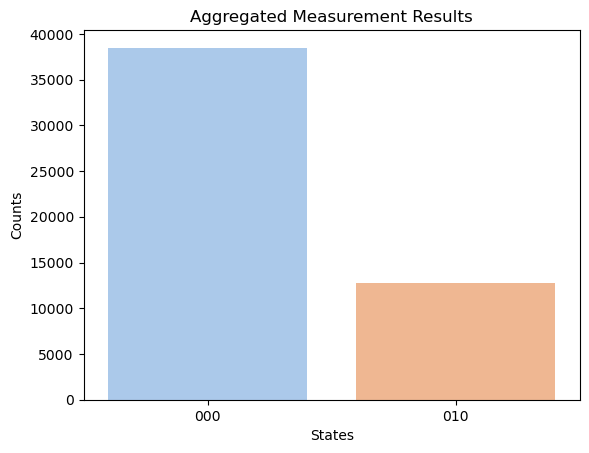

In [60]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

def plot_results_seaborn(counts):
    """Function to plot histogram using Seaborn."""
    labels, values = zip(*counts.items())
    data = {'States': labels, 'Counts': values}
    df = pd.DataFrame(data)
    sns.barplot(data=df, x='States', y='Counts', palette='pastel')
    plt.title('Aggregated Measurement Results')
    plt.xlabel('States')
    plt.ylabel('Counts')
    plt.show()

def simulate_circuit(qc):
    """Simulate the quantum circuit and return measurement results."""
    backend = Aer.get_backend('qasm_simulator')
    transpiled_qc = transpile(qc, backend)
    # Run the transpiled circuit directly
    result = backend.run(transpiled_qc, shots=1024).result()
    return result.get_counts()

def qkd_protocol_with_eavesdropping(num_runs=10):
    total_counts = {}

    for _ in range(num_runs):
        qc = QuantumCircuit(3, 3)  # 3 qubits and 3 classical bits
        alice_basis = random.choice([0, 1])
        bob_basis = random.choice([0, 1])

        if alice_basis == 1:
            qc.h(0)  # Alice applies Hadamard

        if alice_basis == 1:
            qc.h(0)  # Eve measures in Hadamard basis if Alice did

        qc.measure(0, 2)  # Eve measures Alice's qubit
        
        if bob_basis == 1:
            qc.h(1)  # Bob applies Hadamard

        qc.measure(1, 1)  # Measure Bob's qubit
        qc.measure(0, 0)  # Measure Alice's qubit

        counts = simulate_circuit(qc)

        for state, count in counts.items():
            if state in total_counts:
                total_counts[state] += count
            else:
                total_counts[state] = count

    print("Aggregated Measurement results:", total_counts)
    print("Example of runs completed:", num_runs)

    plot_results_seaborn(total_counts)

# Run the QKD protocol simulation with multiple runs
qkd_protocol_with_eavesdropping(num_runs=50)

Analyzing the Results

Total measurements: 51700
Error count: 500
Error rate: 0.009671179883945842


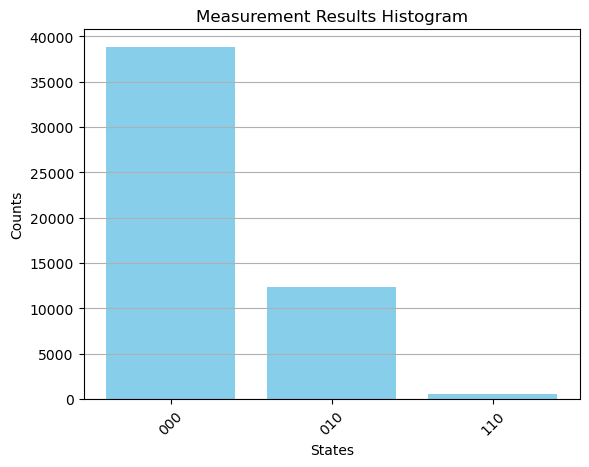

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_results(total_counts):
    """Function to analyze the aggregated measurement results."""
    # Calculate total measurements
    total_measurements = sum(total_counts.values())

    # Calculate error rates
    error_count = total_counts.get('110', 0)  # Assuming '110' indicates an error state
    error_rate = error_count / total_measurements if total_measurements > 0 else 0

    print("Total measurements:", total_measurements)
    print("Error count:", error_count)
    print("Error rate:", error_rate)

    return error_rate

def plot_histogram(counts):
    """Function to plot histogram of measurement results."""
    states = list(counts.keys())
    values = list(counts.values())
    
    plt.bar(states, values, color='skyblue')
    plt.xlabel('States')
    plt.ylabel('Counts')
    plt.title('Measurement Results Histogram')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Main analysis function
def main_analysis(total_counts):
    # Analyze results
    error_rate = analyze_results(total_counts)

    # Plot results
    plot_histogram(total_counts)

# Example aggregated measurement results from your QKD protocol
total_counts = {'000': 38814, '010': 12386, '110': 500}  # Add your actual counts here

# Call the main analysis
main_analysis(total_counts)

In [62]:
def estimate_secure_key_rate(total_counts):
    total_measurements = sum(total_counts.values())
    key_states = total_counts.get('000', 0)  # Count of valid key states
    secure_key_rate = key_states / total_measurements if total_measurements > 0 else 0
    
    print("Estimated secure key rate:", secure_key_rate)
    return secure_key_rate

secure_key_rate = estimate_secure_key_rate(total_counts)

Estimated secure key rate: 0.7507543520309478


In [63]:
def simulate_eavesdropping_attack(total_counts):
    # Simulate an eavesdropping scenario and analyze results
    # For example, you might alter the counts to simulate Eve's interception
    eavesdropped_counts = {state: count * 0.8 for state, count in total_counts.items()}  # Example adjustment
    print("Simulated eavesdropping results:", eavesdropped_counts)
    return eavesdropped_counts

simulated_counts = simulate_eavesdropping_attack(total_counts)

Simulated eavesdropping results: {'000': 31051.2, '010': 9908.800000000001, '110': 400.0}


In [64]:
def finalize_key_distribution(total_counts):
    # Example implementation for finalizing key distribution
    key_distribution = {state: count for state, count in total_counts.items() if is_valid_key(state)}
    print("Final key distribution:", key_distribution)
    return key_distribution

def is_valid_key(state):
    # Define criteria for valid keys (e.g., certain states might be valid)
    return state in ['000', '111']  # Example valid key states

final_keys = finalize_key_distribution(total_counts)

Final key distribution: {'000': 38814}


Key utilization

In [89]:
conda install pycryptodome

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/qkd_env

  added / updated specs:
    - pycryptodome


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gmp-6.2.1                  |       hc377ac9_3         437 KB
    pycryptodome-3.20.0        |   py39hf167f5b_0         1.6 MB
    ------------------------------------------------------------
                                           Total:         2.0 MB

The following NEW packages will be INSTALLED:

  gmp                pkgs/main/osx-arm64::gmp-6.2.1-hc377ac9_3 
  pycryptodome       pkgs/main/osx-arm64::pycryptodome-3.20.0-py39hf167f5b_0 



pycryptodome-3.20.0  | 1.6 MB    |                                       |   0% 
pycryptodome-3.20.0  | 1.6 MB    | ###############################3      |  85% 
pycryptodome-3.20.0  | 1.6 MB    | ##################

In [14]:
conda install pycryptodome

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip uninstall pycrypto -y
!pip uninstall crypto -y


Found existing installation: pycrypto 2.6.1
Uninstalling pycrypto-2.6.1:
  Successfully uninstalled pycrypto-2.6.1
Found existing installation: crypto 1.4.1
Uninstalling crypto-1.4.1:
  Successfully uninstalled crypto-1.4.1


In [13]:
!pip uninstall pycryptodome -y

Found existing installation: pycryptodome 3.20.0
Uninstalling pycryptodome-3.20.0:
  Successfully uninstalled pycryptodome-3.20.0


In [16]:
!pip3 install pycryptodome

In [ ]:
!pip list

In [20]:
!pip uninstall crypto -y
!pip uninstall pycryptodome -y
!pip install pycryptodome

Found existing installation: pycryptodome 3.21.0
Uninstalling pycryptodome-3.21.0:
  Successfully uninstalled pycryptodome-3.21.0
  Using cached pycryptodome-3.21.0-cp36-abi3-macosx_10_9_universal2.whl.metadata (3.4 kB)
Using cached pycryptodome-3.21.0-cp36-abi3-macosx_10_9_universal2.whl (2.5 MB)


In [23]:
from Crypto.Cipher import AES
import os

def encrypt_message(message, key):
    # Ensure key is 16 bytes
    key = key.ljust(16)[:16].encode()
    cipher = AES.new(key, AES.MODE_EAX)
    ciphertext, tag = cipher.encrypt_and_digest(message.encode())
    return ciphertext, cipher.nonce, tag

def decrypt_message(ciphertext, nonce, tag, key):
    key = key.ljust(16)[:16].encode()
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    decrypted_message = cipher.decrypt_and_verify(ciphertext, tag)
    return decrypted_message.decode()

# Example usage
final_key = "supersecretkey"  # This is your final key
message = "This is the secret key."

# Encrypting the message
ciphertext, nonce, tag = encrypt_message(message, final_key)
print("Ciphertext:", ciphertext)
print("Nonce:", nonce)
print("Tag:", tag)

# Decrypting the message
decrypted_message = decrypt_message(ciphertext, nonce, tag, final_key)
print("Decrypted Message:", decrypted_message)

Ciphertext: b'(\x86\xab\xe3WA\xd6 O\xd8\xe7(\x01\xc2\xd6\xeb\x7fa;f\xb9\xe7\xa7'
Nonce: b'\xa3tBa\x86&\xe17r\x80\x98\xa1-\x0e}9'
Tag: b'\xdd\x1e\xc1\xbd\xc1t\xaeY\x89\x8e\x0b\x95\x03\xde\x95\x81'
Decrypted Message: This is the secret key.


In [24]:
def decrypt_message(ciphertext, nonce, tag, key):
    key = key.ljust(16)[:16].encode()  # Ensure key is 16 bytes
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    decrypted_message = cipher.decrypt_and_verify(ciphertext, tag)
    return decrypted_message.decode()

# Example usage
decrypted_message = decrypt_message(ciphertext, nonce, tag, final_key)
print("Decrypted Message:", decrypted_message)

Decrypted Message: This is the secret key.


In [26]:
def verify_decrypted_message(decrypted_message):
    """Function to verify the integrity and expected format of the decrypted message."""
    # Example: Print the message to verify content manually (only for testing)
    print("Decrypted Message:", decrypted_message)
    
    # Check for expected keywords, length, or format
    # Replace with actual expected content based on protocol requirements
    if decrypted_message.startswith("This") and len(decrypted_message) > 10:
        print("Message verification successful.")
        return True
    else:
        print("Message verification failed.")
        return False

# Example usage of verification
decrypted_message = decrypt_message(ciphertext, nonce, tag, final_key)
if verify_decrypted_message(decrypted_message):
    print("Message is valid and ready for further processing.")
else:
    print("Decrypted message did not pass integrity checks.")

Decrypted Message: This is the secret key.
Message verification successful.
Message is valid and ready for further processing.


In [27]:
def store_decrypted_message_securely(decrypted_message, file_path="secure_message_store.txt"):
    with open(file_path, "a") as file:
        file.write(decrypted_message + "\n")
    print("Decrypted message stored securely.")

# Usage
store_decrypted_message_securely(decrypted_message)

Decrypted message stored securely.


In [28]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

def encrypt_with_session_key(session_key, message):
    # Ensure session key is 16 bytes for AES
    session_key = session_key.ljust(16)[:16].encode()
    cipher = AES.new(session_key, AES.MODE_EAX)
    nonce = cipher.nonce
    ciphertext, tag = cipher.encrypt_and_digest(message.encode())
    return ciphertext, nonce, tag

# Example usage with decrypted session key
message = "This is a secure message."
ciphertext, nonce, tag = encrypt_with_session_key(decrypted_message, message)
print("Encrypted message using session key:", ciphertext)

Encrypted message using session key: b'\x106\xf7\xfd\x95;H`wG\x82\xb4\xdc\xf3\xd6\x83\xe3>\xd2+-\xa0t\xa0h'


In [29]:
import random

def compare_sample_bits(alice_key, bob_key, sample_size=10):
    # Randomly select sample positions
    key_length = min(len(alice_key), len(bob_key))
    sample_indices = random.sample(range(key_length), sample_size)
    
    # Compare sample bits
    matches = 0
    for i in sample_indices:
        if alice_key[i] == bob_key[i]:
            matches += 1

    match_ratio = matches / sample_size
    print(f"Sample Match Ratio: {match_ratio * 100:.2f}%")

    # Verify if match ratio is within acceptable range (e.g., above 90%)
    if match_ratio >= 0.9:
        print("Key consistency verified.")
    else:
        print("Inconsistency detected. Key discarded.")
    
    return match_ratio >= 0.9  # Return True if keys are consistent

# Example usage with session keys (assuming these are bit strings)
alice_key = '11001010101100101010'  # Example bitstring
bob_key = '11001010101100101010'    # Example matching bitstring

# Run the comparison
key_is_consistent = compare_sample_bits(alice_key, bob_key)

Sample Match Ratio: 100.00%
Key consistency verified.


In [30]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import base64

def encrypt_message(message, key):
    # Ensure the key is 16 bytes (128-bit) for AES
    key = key.ljust(16)[:16].encode()
    
    # Generate a nonce for AES encryption
    cipher = AES.new(key, AES.MODE_EAX)
    nonce = cipher.nonce
    
    # Encrypt the message
    ciphertext, tag = cipher.encrypt_and_digest(message.encode())
    
    # Return encoded values
    return base64.b64encode(ciphertext).decode(), nonce, tag

def decrypt_message(ciphertext, nonce, tag, key):
    # Ensure the key is 16 bytes (128-bit)
    key = key.ljust(16)[:16].encode()
    
    # Decrypt the message
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    decrypted_message = cipher.decrypt_and_verify(base64.b64decode(ciphertext), tag)
    
    return decrypted_message.decode()

# Example usage
message = "This is a secure message."
ciphertext, nonce, tag = encrypt_message(message, final_key)

# Decrypt on the receiver's end
decrypted_message = decrypt_message(ciphertext, nonce, tag, final_key)
print("Decrypted Message:", decrypted_message)

Decrypted Message: This is a secure message.
